In [1]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import time

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import clear_output

%config IPCompleter.greedy=True

path = "/Users/cevidd/Documents/projects/heterogeneity/finance/"

In [2]:
def adjust_stock(stock):
    adjusted_price = [stock['4. close'][0]]
    
    for i in range(1, len(stock.index)):
        old_price = stock['4. close'][i - 1]
        new_price = (stock['4. close'][i] + stock['7. dividend amount'][i]) * stock['8. split coefficient'][i]
        adjusted_price.append(adjusted_price[-1] * new_price / old_price)
    
    stock['adjusted'] = adjusted_price

In [3]:
def get_stock(name):
    ts = TimeSeries(key='6N3U0GRHNBOAQHA8', output_format='pandas')
    stock, meta = ts.get_daily_adjusted(symbol=name, outputsize='full')
    stock = stock.sort_index()
    adjust_stock(stock)    
    return stock

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,adjusted
date,,,,,,,,,
2000-04-05,22.38,23.50,21.94,23.06,23.06,168600.0,0.0,1.0,23.06
2000-04-06,23.25,23.50,22.56,23.50,23.50,42000.0,0.0,1.0,23.50
2000-04-07,23.44,24.13,23.38,23.88,23.88,45500.0,0.0,1.0,23.88
2000-04-10,24.00,24.00,22.50,22.63,22.63,35000.0,0.0,1.0,22.63
2000-04-11,22.13,22.25,21.75,22.13,22.13,51800.0,0.0,1.0,22.13


,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,adjusted
date,,,,,,,,,
2020-03-31,8.58,9.3808,8.50,9.05,9.05,1346724.0,0.0,1.0,9.05
2020-04-01,8.83,8.9900,8.25,8.38,8.38,1162086.0,0.0,1.0,8.38
2020-04-02,8.33,9.1535,8.31,8.80,8.80,1037336.0,0.0,1.0,8.80
2020-04-03,8.75,9.4988,8.41,9.33,9.33,1225934.0,0.0,1.0,9.33
2020-04-06,9.97,10.3900,9.32,9.92,9.92,1606543.0,0.0,1.0,9.92


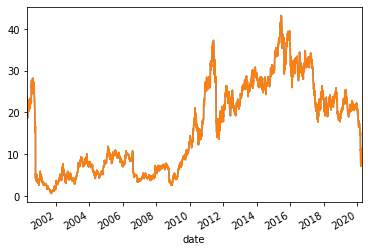

In [4]:
stock = get_stock('IMAX')

stock.head()
stock.tail()
stock['4. close'].plot()
stock['adjusted'].plot()

In [216]:
#spdr
#sector_tickers = ['XLB', 'XLC', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLRE', 'XLU', 'XLV', 'XLY']
#vanguard
sector_tickers = ['VOX', 'VCR', 'VDC', 'VDE', 'VFH', 'VHT', 'VIS', 'VGT', 'VAW', 'VNQ', 'VPU']

sector_data = {}
for tkr in sector_tickers:
    print(tkr)
    sector_data[tkr] = get_stock(tkr)
    time.sleep(15)

with open(path + "sector_data.pkl", 'wb') as file:
    pickle.dump([sector_data], file)

XLB
XLC
XLE
XLF
XLI
XLK
XLP
XLRE
XLU
XLV
XLY


In [228]:
indicator_tickers = []
#Commodities
indicator_tickers += ['GLD'] # gold
indicator_tickers += ['SLV'] # silver
indicator_tickers += ['DBB'] # base metals: aluminium, copper, zinc 
indicator_tickers += ['USO'] # oil
indicator_tickers += ['UNG'] # natural gas
indicator_tickers += ['DBC'] # mix of commodities
indicator_tickers += ['GSG'] # mix of commodities
indicator_tickers += ['DBA'] # mix agriculture
#Bonds
indicator_tickers += ['AGG'] # US government bonds
indicator_tickers += ['LQD'] # corporate bonds
indicator_tickers += ['HYG'] # junk corporate bonds
indicator_tickers += ['BWX'] # international government bonds
#Countries
indicator_tickers += ['SPY'] # USA
indicator_tickers += ['EWU'] # UK
indicator_tickers += ['EWQ'] # France
indicator_tickers += ['EWG'] # Germany
indicator_tickers += ['EWJ'] # Japan
indicator_tickers += ['GXC'] # China
indicator_tickers += ['EWL'] # Switzerland
#General markets
indicator_tickers += ['ILF'] # Latin America
indicator_tickers += ['VWO'] # emerging markets
indicator_tickers += ['VEA'] # developed markets without USA
#Currencies
indicator_tickers += ['FXE'] # Euro
indicator_tickers += ['FXY'] # Yen
indicator_tickers += ['FXB'] # Pound Sterling
indicator_tickers += ['FXF'] # Swiss Franc
indicator_tickers += ['CYB'] # Yuan

indicator_data = {}
for tkr in indicator_tickers:
    print(tkr)
    indicator_data[tkr] = get_stock(tkr)
    time.sleep(15)

with open(path + "indicator_data.pkl", 'wb') as file:
    pickle.dump([indicator_data], file)

GLD
SLV
DBB
USO
UNG
DBC
GSG
DBA
AGG
LQD
HYG
BWX
SPY
EWU
EWQ
EWG
EWJ
GXC
EWL
ILF
VWO
VEA
FXE
FXY
FXB
FXF
CYB


In [229]:
with open(path + "sector_data.pkl", 'rb') as file:  # Python 3: open(..., 'wb')
    [sector_data] = pickle.load(file)

with open(path + "indicator_data.pkl", 'rb') as file:  # Python 3: open(..., 'wb')
    [indicator_data] = pickle.load(file)

all_data = {**sector_data, **indicator_data}

In [258]:
from datetime import datetime
tmin = datetime.min
tmax = datetime.max

for tkr in all_data.keys():
    start = all_data[tkr].index[0]
    end = all_data[tkr].index[-1]
    print(tkr, start, end)
    tmin = max(tmin, start)
    tmax = min(tmax, end)

dataset = pd.DataFrame(index=pd.date_range(start=tmin, end=tmax, freq='D'))
for tkr in all_data.keys():
    dataset[tkr] = all_data[tkr]['adjusted']

dataset.isna().sum()
dataset = dataset.dropna()
dataset.to_csv(path + "ETF.csv", index=True)

VOX 2004-09-29 00:00:00 2020-02-13 00:00:00
VCR 2004-01-30 00:00:00 2020-02-13 00:00:00
VDC 2004-01-30 00:00:00 2020-02-13 00:00:00
VDE 2004-09-29 00:00:00 2020-02-13 00:00:00
VFH 2004-01-30 00:00:00 2020-02-13 00:00:00
VHT 2004-01-30 00:00:00 2020-02-13 00:00:00
VIS 2004-09-29 00:00:00 2020-02-13 00:00:00
VGT 2004-01-30 00:00:00 2020-02-13 00:00:00
VAW 2004-01-30 00:00:00 2020-02-13 00:00:00
VNQ 2004-09-29 00:00:00 2020-02-13 00:00:00
VPU 2004-01-30 00:00:00 2020-02-13 00:00:00
GLD 2004-11-18 00:00:00 2020-02-13 00:00:00
SLV 2006-04-28 00:00:00 2020-02-13 00:00:00
DBB 2007-01-05 00:00:00 2020-02-13 00:00:00
USO 2006-04-10 00:00:00 2020-02-13 00:00:00
UNG 2007-04-18 00:00:00 2020-02-13 00:00:00
DBC 2006-02-06 00:00:00 2020-02-13 00:00:00
GSG 2006-07-21 00:00:00 2020-02-13 00:00:00
DBA 2007-01-05 00:00:00 2020-02-13 00:00:00
AGG 2003-09-26 00:00:00 2020-02-13 00:00:00
LQD 2002-07-26 00:00:00 2020-02-13 00:00:00
HYG 2007-04-11 00:00:00 2020-02-13 00:00:00
BWX 2007-10-11 00:00:00 2020-02-

VOX    1332
VCR    1333
VDC    1332
VDE    1332
VFH    1332
VHT    1332
VIS    1332
VGT    1332
VAW    1332
VNQ    1332
VPU    1332
GLD    1332
SLV    1332
DBB    1332
USO    1332
UNG    1332
DBC    1332
GSG    1332
DBA    1332
AGG    1332
LQD    1332
HYG    1332
BWX    1332
SPY    1332
EWU    1332
EWQ    1332
EWG    1332
EWJ    1332
GXC    1332
EWL    1332
ILF    1332
VWO    1332
VEA    1332
FXE    1332
FXY    1332
FXB    1332
FXF    1332
CYB    1332
dtype: int64

In [251]:
dataset=dataset.dropna()
i=0
res = dataset.index[i+1] - dataset.index[i]
for i in range(len(dataset.index)):
    res = max(res, dataset.index[i+1] - dataset.index[i])
res

Timedelta('5 days 00:00:00')